In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import torch

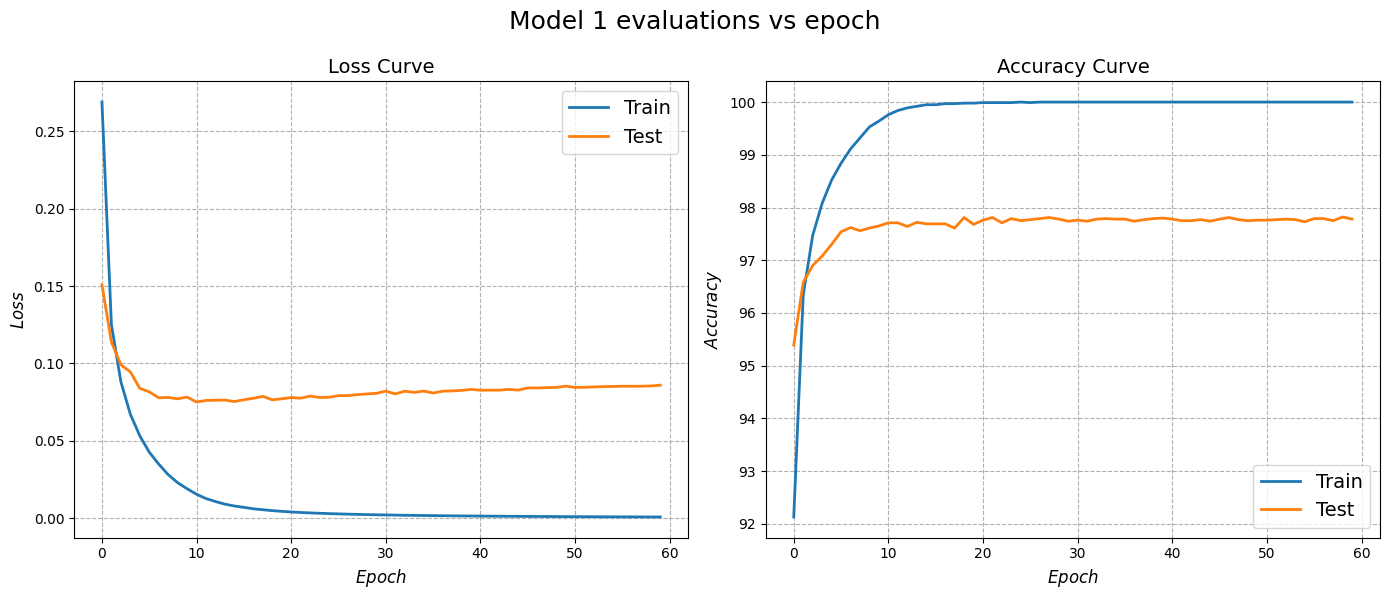

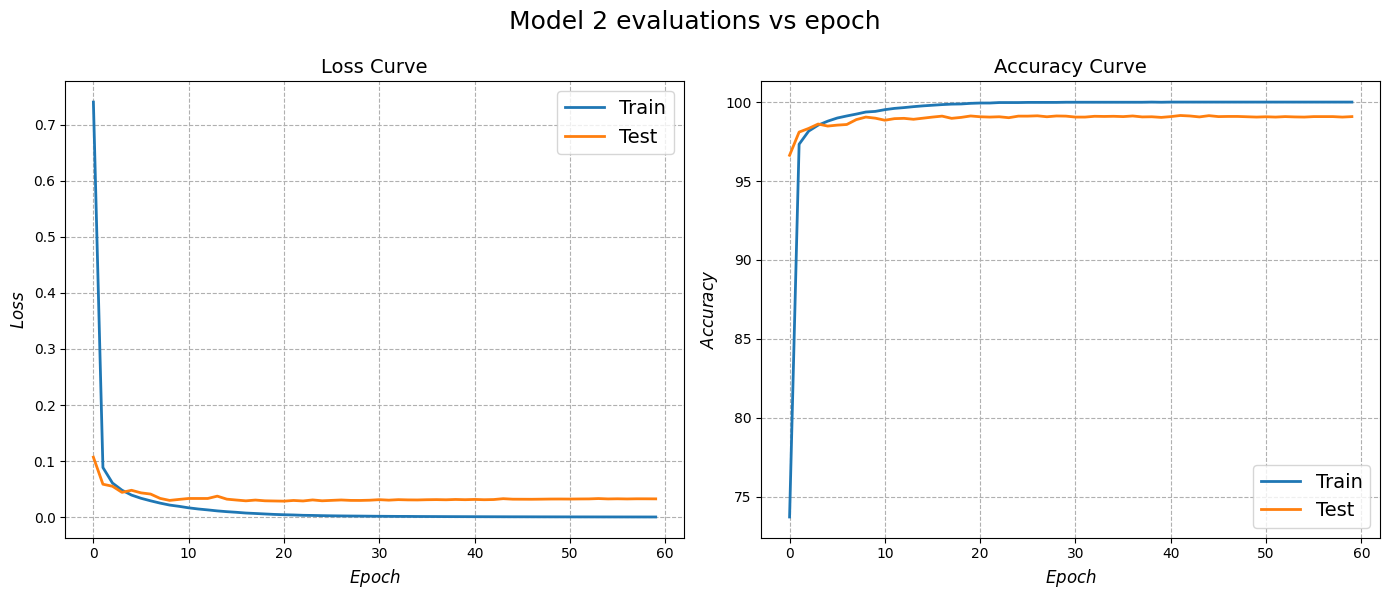

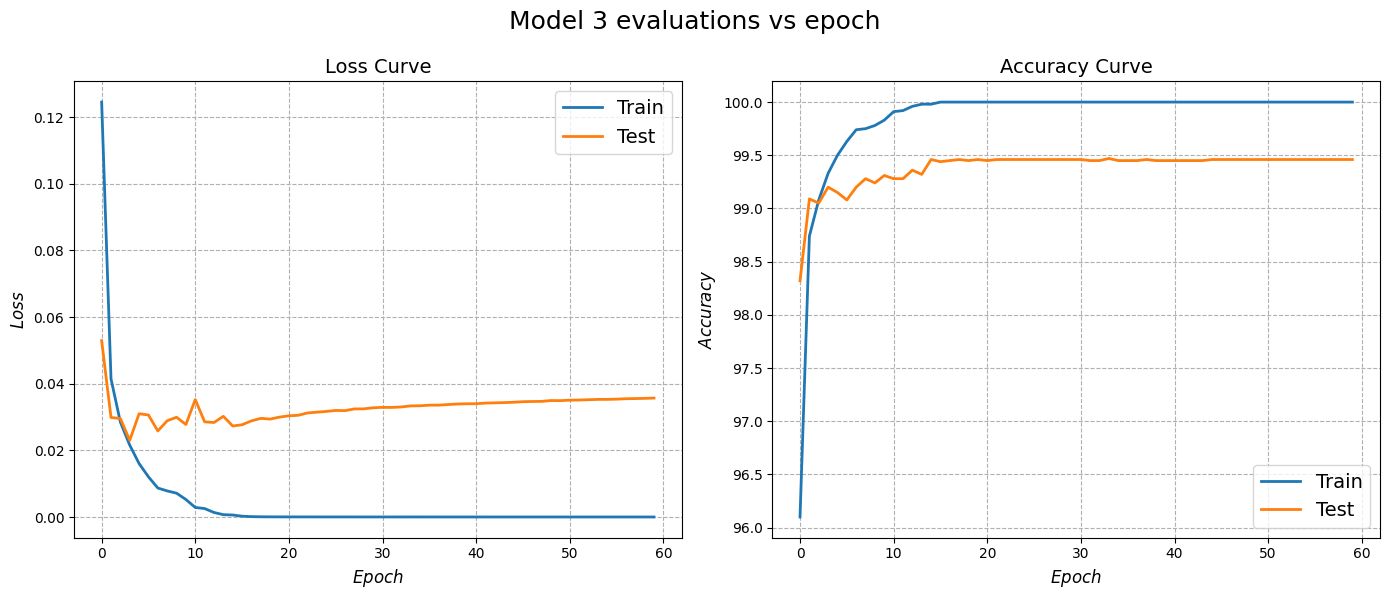

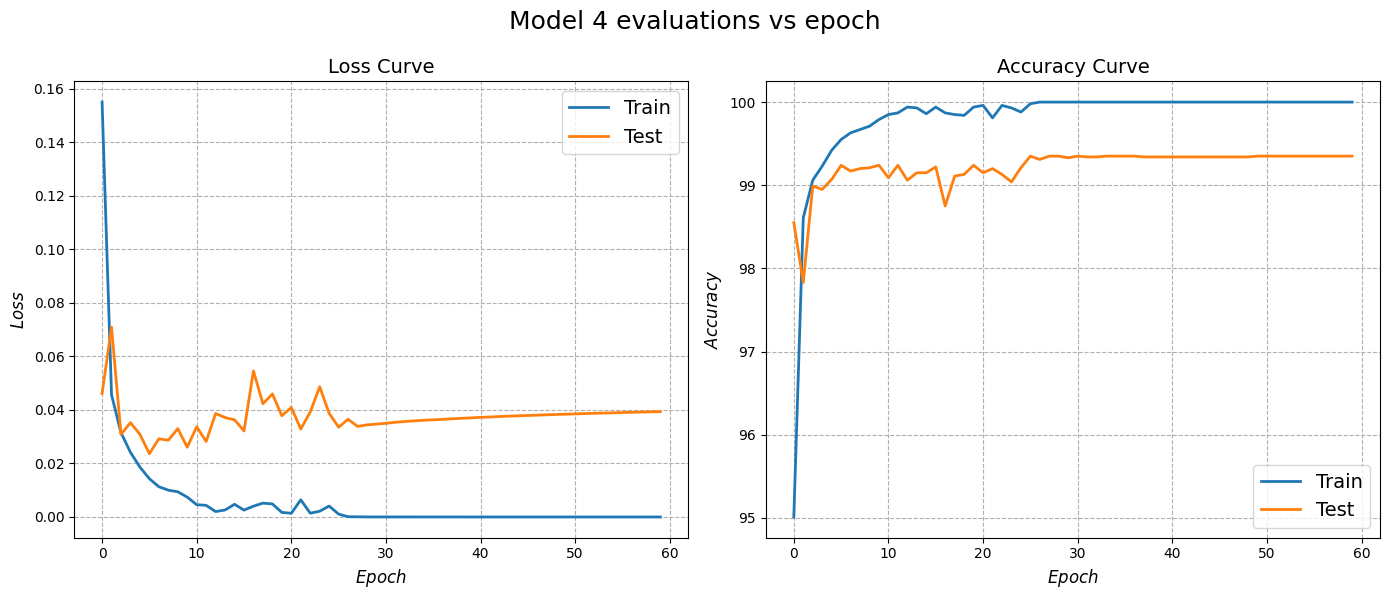

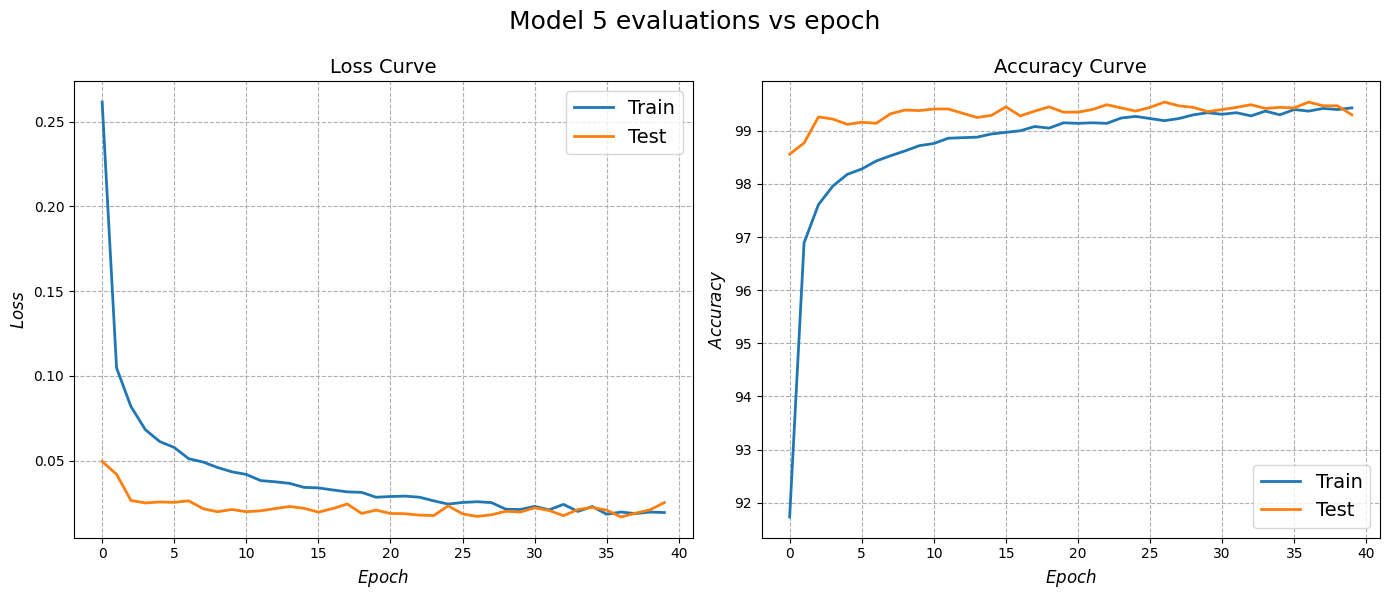

In [29]:
for model in range(1, 6):

    history = pd.read_csv(f'history_mode_{model}.csv')
    for i in range(history.shape[0]):
        s = history.loc[i, 'train_accuracy']
        history.loc[i, 'train_accuracy'] = float(s.split('(')[-1].split(')')[0]) * 100

        s = history.loc[i, 'test_accuracy']
        history.loc[i, 'test_accuracy'] = float(s.split('(')[-1].split(')')[0])

    # Create Subplot
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Set Figure Title
    fig.suptitle(f"Model {model} evaluations vs epoch",
                fontsize=18,
                y=0.99)

    # Set Figure facecolor to White
    fig.set_facecolor('white')

    # Plot loss curves
    ax[0].plot(history['epoch'], history['train_loss'],
               linewidth=2, label='Train')
    ax[0].plot(history['epoch'], history['test_loss'],
               linewidth=2, label='Test')

    # Set labels for the x and y axis
    ax[0].set_xlabel(r'$Epoch$', size=12)
    ax[0].set_ylabel(r'$Loss$', size=12)
    ax[0].set_title("Loss Curve", fontsize=14)

    # Show legends
    ax[0].legend(fontsize=14)
    # Turn on grid
    ax[0].grid(linestyle='dashed')

    # Plot accuracy curves
    ax[1].plot(history['epoch'], history['train_accuracy'], 
               linewidth=2, label='Train')
    ax[1].plot(history['epoch'], history['test_accuracy'],
               linewidth=2, label='Test')

    # Set labels for the x and y axis
    ax[1].set_xlabel(r'$Epoch$', size=12)
    ax[1].set_ylabel(r'$Accuracy$', size=12)
    ax[1].set_title("Accuracy Curve", fontsize=14)

    # Show legends
    ax[1].legend(fontsize=14)
    # Turn on grid
    ax[1].grid(linestyle='dashed')

    plt.tight_layout()

    plt.savefig(f'results_mode_{model}.png', dpi=300)
